In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("twitter.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
df['label'].value_counts()

,count
label,
0,29720
1,2242


In [15]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


In [16]:
df = df.dropna()

In [18]:
X_text = df['tweet']
y = df['label']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print ("Model Accuracy:", accuracy)

Model Accuracy: 0.9440012513686845


In [28]:
sample_text = ["I love this product"]
sample_vec = vectorizer.transform(sample_text)

print("Prediction:", model.predict(sample_vec))

Prediction: [0]


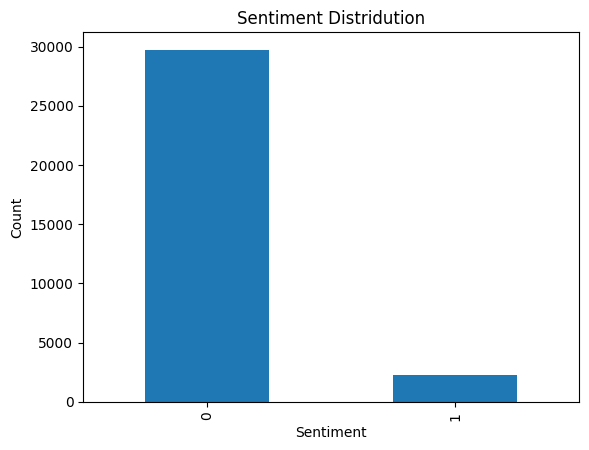

In [30]:
df['label'].value_counts().plot(kind='bar')
plt.title('Sentiment Distridution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Conclusion:**

This project performs sentiment analysis on Twitter text data.

Text data was converted into numerical form using CountVectorizer.

Naive Bayes algorithm was used to classify sentiments as positive or negative.This model acheive good accuracy.